# #1

![Первый номер](img\1.png)

### ПРИМЕЧАНИЕ

Правильный ответ в задаче - 348. Я, честно говоря, не совсем понимаю, как это вышло. Ниже приведено мое решение. Если вы найдете в нем, что я посчитал неправильно, обязательно дайте знать.

Задача несложно решается с помощью динамического программирования. Единственное, что необходимо знать: уможение матриц $A \in \mathbb{R}^{m \times m}$ и $B \in \mathbb{R}^{m \times p}$ требует $O(mnp)$ операций - $mp$ скалярных произведений векторов размерности $\mathbb{R}^{n \times 1}$.

In [1]:
import numpy as np
from functools import cache

def matrixChainOrder(dims: list[int]) -> int:
    @cache
    def a(i, j):
        return min((a(i, k) + dims[i] * dims[k] * dims[j] + a(k, j) 
                   for k in range(i + 1, j)), default=0)

    return a(0, len(dims) - 1)

$A_{10 \times 7} B_{7 \times 4} c_{4 \times 1}$ требует

In [2]:
matrixChainOrder([10, 7, 4, 1])

98

операций, что соответствует порядку $A(Bc)$: $28 + 70=98$ операций.

$D_{10 \times 3} E_{3 \times 8} F_{8 \times 4} g_{4 \times 1}$ требует

In [3]:
matrixChainOrder([10, 3, 8, 4, 1])

86

операций, что соответствует порядку $D(E(Fg))$: $32 + 24 + 30 = 86$ операций.

плюс 10 операцмий для сложения двух векторов размерности $10 \times 1$. \<br>
Итого для выполнения преобразований всего требуется

In [4]:
matrixChainOrder([10, 7, 4, 1]) + matrixChainOrder([10, 3, 8, 4, 1]) + 10

194

операции.

Мой ответ: 194  
Правильный ответ: 348

# #2

![Второй номер](img\2.png)

Единственное решение, которое приходит в голову - написать рекурсивный алгоритм, который бы добавлял в список длины маршрутов (которых всего 11!). Затем найти в этом списке количество максимальных вхождений. Что я и сделал.

Правильный ответ: 86400.

# #3

![Третий номер](img\3.png)

$p_i = i/36$, $i = \overline{1,8}$ согласно условию задачи. Посчитаем вероятность того, что кубик бросили не менее 3 раз:

$P(\text{бросили} \geq 3 \text{ раз}) = 1 - P(\text{бросили} < 3 \text{ раз}) = 1 - P(\text{5 выпала на 1 бросок}) - P(\text{5 выпала на 2 бросок}) = 1 - 5/36 - (1-5/36)(5/36) = 1 - (5/36)(2-5/36)=961/1296$

Задачу можно решить и другим способом:

$P(\text{бросили} \geq 3 \text{ раз}) = \sum_{i=3}^{\infty} (1-5/36)^{i-1} (5/36) = (5/36) \sum_{i=3}^{\infty} (31/36)^{i-1} =  (5/36) \sum_{i=2}^{\infty} (31/36)^{i} = (5/36) \bigg( \big( \sum_{i=0}^{\infty} (31/36)^{i} \big) - 1 - 31/36 \bigg) = (5/36)\bigg( \frac{1}{1 - 31/36} - 1 - 31/36 \bigg) = (5/36)(961/180) = 961/1296$

Правильный ответ: 961/1296

### #4

![Четвертый номер](img\4.png)

### ПРИМЕЧАНИЕ
Мой ответ в задаче неправильный. Опять же, если вы знаете, почеме - обязательно дайте и мне знать.

В этой задаче я в лоб считал площадь под ROC-кривой. Мне очень интересно, зачем авторы заданий дали решающее правило, если решающее правило соответствует лишь какой-то точке на ROC-кривой, а площадь под ней совершенно не зависит от решающего правила.

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

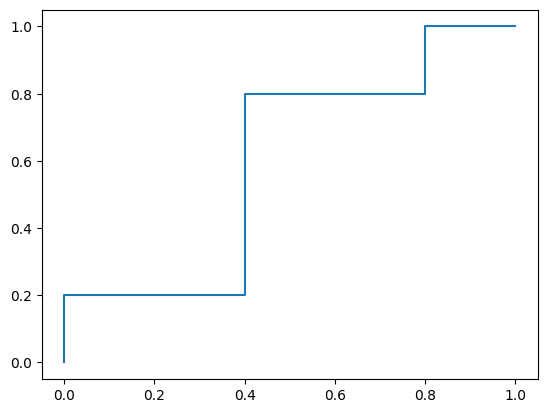

In [21]:
y_true = np.array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1])
y_score = np.array([-1, -5, 4, 5, 2, 2, -1, -4, 3, 1])

fpr, tpr, thresholds = roc_curve(y_true, y_score)

plt.plot(fpr, tpr);

In [22]:
roc_auc_score(y_true, y_score).round(3)

0.6

Мой ответ: 0.6  
Правильный ответ: 0.7

### #5

![Пятый номер](img\5.png)

### ПРИМЕЧАНИЕ

Мой ответ в задаче неправильный. Если найдете ошибку в размышлениях - дайте знать.

Очевидно, оба данных условия выполняются, если никакие два изначальных центра не расположены симметрично относительно одной из вершин треугольника. В свою очередь это возможно, только если три изначальных центра кластера были друг рядом с другом. Иными словами, мы свели задачу к следующей:  
  
*Какова вероятность того, что три человека, сев случайным образом за одно из 15 мест за круглым столом, окажутся друг рядом с другом.*

Считается это довольно просто. Посчитаем с помощью классической вероятности: в числителе - число всевозможных удовлетворительных исходов, в знаменателе - число всевозможных исходов в принципе. Таким образом: в числителе имеем - их можно 15 способами посадить всех вместе + 3! перестановок между ними, в знаменателе - первый имеет 15 вариантов сесть, второй - оставшиеся 14, третий - оставшиеся 13, имеем 

$15*3!/(15*14*13) = 3/91$

Это же значение можно получить множеством других способов.

Мой ответ: 3/91  
Правильный ответ: 3/182

# #6

![Шестой номер 1](img\6_1.png)
![Шестой номер 2](img\6_2.png)
![Шестой номер 3](img\6_3.png)

В данной задаче просто считаем изначальное количество весов: $10*30 + 10*5 + 10*5 + 10*20 = 600$. Таким образом, надо найти такие ранги матриц, при которых всего 200 весов.  
Ниже в перменных $M1, M2, M3, M4$ хранятся количества весов при скелетном разложении матриц на всевозможные ранги. Например, $M1 = [40, 80, 120, 160, \dots, 400, 440]$: если $\text{rk}(B1_{10 \times 30})=r$, то число параметров $= 10*r + r*30$, $r = \overline{1,10}$ 

In [23]:
import numpy as np

In [24]:
M1 = np.arange(40, 440, 40)
M2 = np.arange(15, 90, 15)
M3 = np.arange(15, 90, 15)
M4 = np.arange(30, 330, 30)

for (i1, w1) in enumerate(M1):
    for (i2, w2) in enumerate(M2):
        for (i3, w3) in enumerate(M3):
            for (i4, w4) in enumerate(M4):
                if w1 + w2 + w3 + w4 == 200 and i1 * i2 * i3 * i4 != 0:
                    print (i1+1, i2+1, i3+1, i4+1)

2 2 2 2


Правильный ответ: 2, 2, 2, 2

# #7

![Седьмой номер](img\7.png)

Довольно таки неприятная задача. Подход следующий. Обозначим за $M$ - максимальное значение номинала карт, $m$ - минимальное значение номинала карт.  
Нам нужно определить, для какой из колод мат. ожидание $\mathbb{E}[M + m]$ наибольшее.  
Сделаем это следующим образом: В силу линйености мат. ожидания  $\mathbb{E}[M] + \mathbb{E}[m]$. Теперь каждое из этих значений можно рассчитать за линейное время. Разберемся на примере $\mathbb{E}[M]$:  

Пусть в текущей колоде $q$ уникальных карт, каждая из которых встречается, вообще говоря, не один раз, тогда вероятность вытянуть карту $q$ обозначим за $p_q$. Значение карты $M$ будет максимальным из трех вытянутых в следующих случаях:
* номиналы других 2ух карт равны M 
* номинал одной из 2ух других равен M, а другой - меньше M
* номинал других 2ух карт  меньше M

Аналонично для $\mathbb{E}[m]$. Аккуратно это расписав, учтя все перестановки и тд, можем посчитать вероятности этих событий и посчитать $\mathbb{E}[M]$ и $\mathbb{E}[m]$ по определению.  
Сделав все это, можно записать следующий аккуратный код.

In [25]:
from sys import stdin, stdout
import numpy as np

E_max=0
n_max=0

N = int(stdin.readline())
for n in range(N):

    k = int(stdin.readline())
    cards = np.array(list(map(int, stdin.readline().split())), dtype='int64')

    nums = np.unique(cards)
    probs = np.bincount(cards)
    probs = probs[probs>0]/k

    less = np.zeros_like(probs)
    less[1:] = np.cumsum(probs)[:-1]

    great = np.zeros_like(probs)
    great[:-1] = np.cumsum(probs[::-1])[::-1][1:]

    gr_eq = np.zeros_like(probs)
    gr_eq[:-1] = np.cumsum((probs**2)[::-1])[::-1][1:]

    l_eq = np.zeros_like(probs)
    l_eq[1:] = np.cumsum((probs**2))[:-1]

    tmp = np.roll(probs, 1)
    tmp1 = np.cumsum(probs[::-1])[::-1] * tmp
    gr_neq = np.cumsum(tmp1[::-1])[::-1]
    gr_neq[:-2] = gr_neq[2:]
    gr_neq[-2:]=0

    tmp = np.roll(probs, -1)
    tmp1 = np.cumsum(probs) * tmp
    l_neq = np.cumsum(tmp1)
    l_neq[2:] = l_neq[:-2]
    l_neq[:2]=0

    p_min = probs**3 + 3 * probs**2 * great + 3 * probs * gr_eq + 6 * probs * gr_neq
    p_max = probs**3 + 3 * probs**2 * less + 3 * probs * l_eq + 6 * probs * l_neq

    E = (nums * (p_min + p_max)).sum()

    if (E > E_max):
        n_max = n
        E_max = E

stdout.write(str(n_max+1) + ' ' + str(E_max))

Данный код прошел все тесты

# #8

![Восьмой номер](img\8.png)

В этой задаче можно заметить, что изменение координат друзей $\vec{a}$ за один круг можно записать при помощи матричного умножения: $\vec{a}_i = M  \vec{a}_{i-1}$. Тогда за $k$ кругов их координаты станут равны $\vec{a}_k = M^k  \vec{a}_{0}$. Остается лишь возвести матрицу в степень $\sim 10^9$ :)  
Звучит страшно, но делается все довольно просто. Можно заметить, что, например $M^{10} = ((M^2)^2)^2 * (M^2) $. То есть вместо умножения матрицы на саму себя 9 раза, мы лишь 3 раза возвели в квадрат (3 умножения) и 1 раз умножили - всего 4 умножения. А ведь так можно сделать с любой степенью. Для этого получаем двоичное представление степени $k$. И храним две матрицы: одну, чтобы постоянно возводить в квадрат (умножать на себя), другая - конечная, котоую мы умножаем на первую лишь при необходимости (когда встречаем 1 в двоичном представлении степени). Таким образом, мы свели $O(k)$ к $O(\log_2 k)$.  
Достаточно аккуратный код написан ниже.

In [ ]:
from sys import stdin, stdout
import numpy as np

T = int(stdin.readline())

for t in range(T):

    n, k = list(map(int, stdin.readline().split()))

    a = np.array(list(map(int, stdin.readline().split())), dtype='ulonglong')

    mat = np.ones((1,n-1))
    for i in range(n-1):
        tmp = np.zeros(n-1)
        tmp[i+1:] = 1
        mat = np.vstack([mat, mat.sum(0) + tmp])
    mat = np.hstack([np.zeros((n,1)), mat])
    mat = mat.astype('ulonglong')

    powers = [1 if k & (1 << (30-_)) else 0 for _ in range(31)][::-1]

    final_mat = np.eye(n, dtype='ulonglong')
    for i, power in enumerate(powers):
        if power==1:
            final_mat = (mat @ final_mat) % 1000000007
        mat = np.linalg.matrix_power(mat, 2) % 1000000007

    a = ((final_mat @ a) % 1000000007).astype('ulonglong')

    stdout.write(' '.join(map(str,a)) + '\n')

Данный код прошел все тесты

# #9

![Девятый номер 1](img\9_1.png)
![Девятый номер 2](img\9_2.png)

Достаточно простая задача на динамической программирование. На каждом шаге мы максимизируем сумме релевантностей. Затем, зная релевантность в каждой точке и максимальную сумму релевантностей, чтобы дойти до этой точке, мы можем восстановить маршрут.

In [1]:
from sys import stdin, stdout
import numpy as np



n = int(stdin.readline())
m = int(stdin.readline())

A = np.array(list(map(int, stdin.readline().split(','))))
for i in range(1, n):
    A = np.vstack([A, np.array(list(map(int, stdin.readline().split(','))))])

Sum = np.zeros_like(A)
Sum[0,:] = np.cumsum(A[0])

path = np.zeros_like(A)
path[n-1, m-1] = 1
path[0, 0] = 1


for i in range(1, n):
    for j in range(i, m):
        Sum[i,j] = A[i,j] + max(Sum[i-1,j-1], Sum[i,j-1])


i=n-1
j=m-1
while(i!=0):
    if Sum[i, j] == Sum[i-1, j-1] + A[i, j]:
        path[i-1,j-1]=1
        i-=1
        j-=1
    else:
        path[i, j-1]=1
        j-=1

path[0,:j+1] = 1

for row in path:
    stdout.write(', '.join(map(str,row)) + '\n')

Данный код прошел все тесты

# #10

![Десятый номер 1](img\10_1.png)
![Десятый номер 2](img\10_2.png)
![Десятый номер 3](img\10_3.png)
![Десятый номер 4](img\10_4.png)
![Десятый номер 5](img\10_5.png)

Задача решается, что называется в лоб. Если вы когда-либо писали сетку с нуля, либо хотя бы имеете пресдтавление о том, что такое forward pass и back propagation, то у вас не возникнет проблем с написанием кода. Иначе, рекомендую обратиться к любой учебной литературе.

In [ ]:
from sys import stdin, stdout
import numpy as np

n = int(stdin.readline())
m = int(stdin.readline())

X = np.array(list(map(float, stdin.readline().split())))
for i in range(n-1):
    X = np.vstack([X, np.array(list(map(float, stdin.readline().split())))])

p = int(stdin.readline())
q = int(stdin.readline())

W = np.array(list(map(float, stdin.readline().split())))
for i in range(p-1):
    W = np.vstack([W, np.array(list(map(float, stdin.readline().split())))])
W=W.T

grad_wr = np.tile(np.sign(X).sum(0).reshape(-1,1), W.shape[1]).T

grad_xb = np.tile(np.sign(W).sum(1).reshape(-1,1), X.shape[0]).T
approx_deriv = np.zeros_like(X) + np.where(np.logical_and(-1<=X, X<0), (2*X+2), 0) + np.where(np.logical_and(0<=X, X<1), (-2*X+2), 0)
grad_xr = grad_xb * approx_deriv

for row in grad_xr:
    stdout.write(' '.join(map(str,row)) + '\n')

for row in grad_wr:
    stdout.write(' '.join(map(str,row)) + '\n')

Данный код прошел все тесты

# #11

![Одиннадцатый номер](img\11.png)

Довольное необычная задача. Модель лежит в папке "11". Преобразования фичей описаны. После генерации всех признаков я решил попробовать обучить модель без текстовых эмбедингов (я просто дропнул всю текстовую информацию). Обучил CatBoostRegressor, подобрал параметры при помощи байесовской оптимизации, и, к моему большому удивлению, это решение набрало максимальный скор.

# #12

![Двенадцатый номер](img\12.png)

Еще одна задача регрессии. Модель лежит в папке "12". Тут преобразовывать фичи не пришлось, только дропнул аутлайеры пр критерию трех сигм. Обучил CatBoostRegressor, точно так же подобрал параметры и вновь набрал максимальный скор.

# #13, #14

![Тринадцатый номер](img\13.png)
![Четырнадцатый номер](img\14.png)

Эти задачи я уже не осилил, а датасеты, к сожалению не сохранились.